In [1]:
#dataframes
import pandas as pd
import h5py

import sys
sys.path.append('../')
import odor_statistics_lib as osm

# user defined functions

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

## Odor Statistics Panels

In [2]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyMASigned.h5")
def get_statistics(df,index,fdf):
    osm.avg_distance(df,index,fdf)
    osm.mean_conc(df,index,fdf)
    osm.motion_statistics(df,index,fdf)
    osm.whiff_blank_duration(df,index,fdf)
    osm.trajectory_speed(df,index,fdf)
    osm.encounter_frequency(df,index,fdf,1,2)
    osm.mean_avg(df,index,fdf)
    osm.mean_t(df,index,fdf)
    osm.std_whiff(df,index,fdf)
    
np.seterr(divide = 'ignore') 
index = osm.get_index(df)
fdf = pd.DataFrame()
get_statistics(df,index,fdf)

/home/gadfly/DataAnalysis/odor_analysis/data_exploration/figure/../odor_statistics_lib.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.efreq.iloc[start] = 1


In [3]:
df['whiff_duration_plot']=np.zeros(len(df))
i = 0
length_of_encounter = []
dt = df.time[1]-df.time[0]   ## dt is constant, dt * length gives length of time
while i < len(index):
    val=0
    val = (dt*(len(index[i])))
    df.whiff_duration_plot.loc[index[i]] = val
    i+=1

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_duration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/291501334.py:8: SettingWithCopyWarning: 

In [4]:
df['whiff_concentration_plot']=np.zeros(len(df))
i = 0
length_of_encounter = []
dt = df.time[1]-df.time[0]   ## dt is constant, dt * length gives length of time
while i < len(index):
    val=0
    val = np.mean(df.odor[index[i]])
    df.whiff_concentration_plot.loc[index[i]] = val
    i+=1

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_concentration_plot.loc[index[i]] = val
/tmp/ipykernel_39483/525301413.py:8: SettingWi

In [5]:
df['whiff_sd_plot']=np.zeros(len(df))
i = 0
length_of_encounter = []
dt = df.time[1]-df.time[0]   ## dt is constant, dt * length gives length of time
while i < len(index):
    val=0
    val = np.std(df.odor[index[i]])
    df['whiff_sd_plot'].loc[index[i]] = val
    i+=1

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['whiff_sd_plot'].loc[index[i]] = val
/tmp/ipykernel_39483/968248736.py:8: SettingWithCopyWarning: 
A value 

### Load Figure First Layout

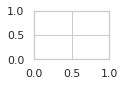

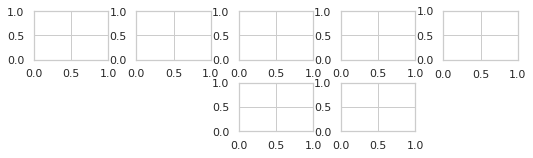

In [83]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig4.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

## Raw Signal

In [84]:
r = [4002.05,4003]

In [85]:
ax=layout.axes[('rawodorfig','rawodor')]
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
x = []
for i in range(len(index)):
    if math.isclose(df.time.loc[index[i][0]],r[0],abs_tol=1):
        x.append(i)
        
for i in range(1,len(x)):
    ax.axvspan(xmin=df.time.loc[index[x[i]][0]],xmax= df.time.loc[index[x[i]][-1]],ymin=0.42,ymax=0.97,  alpha=0.3, color='green')
i=0
for i in range(1,len(x)-1):
    ax.axvspan(xmin=df.time.loc[(index[x[i]][-1])+1],
               xmax= df.time.loc[(index[x[i+1]][0])-1],ymin=0,ymax=0.42,  alpha=0.3, color='purple')

ax.axvspan(xmin=df.time.loc[(index[x[-1]][-1])+1],
           xmax= df.time.loc[(index[x[-1]][-1])+100],ymin=0,ymax=0.42,  alpha=0.3, color='purple')

### Whiff Duration
ax.set_xlim(r)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)
ax.axhline(4.5, linestyle='--', c='red', linewidth=1)
ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Odor, v')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['rawodorfig'], 'rawodorfig', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Duration

In [86]:
ax=layout.axes[('fig2','ele11')]
ax.plot(df.time,df.whiff_duration_plot, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.set_ylim(0,0.2)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,0.2],
                            linewidth=0.5)
ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('Whiff\nTime, s')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Concentration

In [87]:
ax=layout.axes[('fig2','ele13')]
ax.plot(df.time,df.whiff_concentration_plot, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([0,1])
ax.set_ylabel('Mean\nOdor, v')
ax.yaxis.set_label_coords(-0.09, 0.5)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Frequency

In [88]:
df1 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyStatsTime_std.h5")

In [89]:
ax=layout.axes[('fig2','ele15')]
ax.plot(df.time,df.efreq, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,1],
                            linewidth=0.5)

ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [90]:
ax=layout.axes[('fig2','ele16')]
ax.plot(df.time,df.encounter_frequency, c='black', linewidth=0.6)
ax.set_xlim(r)

ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,3],
                            linewidth=0.5)

ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
ax.set_ylabel('hz', rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.2)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Moving Average

In [91]:
ax=layout.axes[('fig2','ele17')]
ax.plot(df.time,df.odor, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.axvspan(xmin=4002.5,xmax= 4003,  alpha=0.3, color='b')
ax.axvspan(xmin=4002.6,xmax= 4003, alpha=0.5, color='r')
ax.axvspan(xmin=4002.7,xmax= 4003, alpha=0.3, color='yellow')
ax.axvspan(xmin=4002.8,xmax= 4003, alpha=0.2, color='green')

ax.grid(False)


ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([0,1])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [92]:
ax=layout.axes[('fig2','ele18')]
ax.plot(df.time,df.ma_inter, c='black',linewidth=0.6, rasterized= True)
ax.set_xlim(r)
ax.grid(False)


ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,5],
                            linewidth=0.5)

ax.set_xticklabels([0,1])

ax.set_ylabel('v', rotation=0)
ax.yaxis.set_label_coords(-0.15, 0.15)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Std Dev

In [93]:
ax=layout.axes[('fig2','std01')]
ax.grid(False)
ax.plot(df.time,df.whiff_sd_plot, c='black', linewidth=0.6,rasterized= True)
ax.set_xlim(r)

ax.set_ylim(0,2)
mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=r,
                            yticks=[0,2],
                            linewidth=0.5)
ax.set_xticklabels([0,1])

ax.set_rasterization_zorder(-20)
ax.set_xlabel('Time,s')
ax.xaxis.set_label_coords(0.5, -0.2)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [94]:

cairosvg.svg2pdf(url='../../../Figure/fig4.svg', write_to='../../../Figure/fig4.pdf')